In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('data/insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [26]:
all_columns         = list(df)
numeric_columns     = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nAll columns')
print(all_columns)
print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


All columns
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['sex', 'smoker', 'region']


Checking for the number of different regions and their stats

<Axes: xlabel='region'>

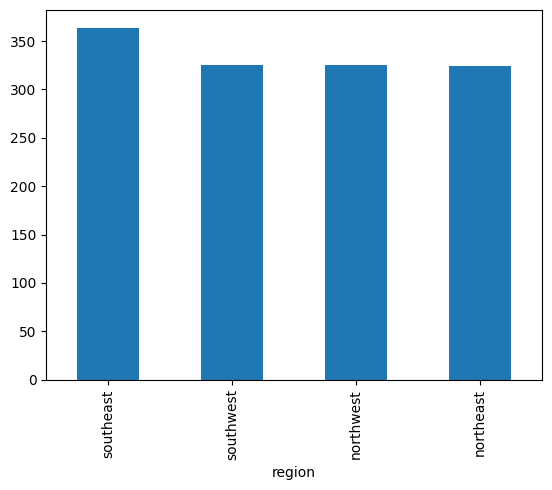

In [8]:
df['region'].value_counts().plot(kind='bar')

<Axes: ylabel='sex'>

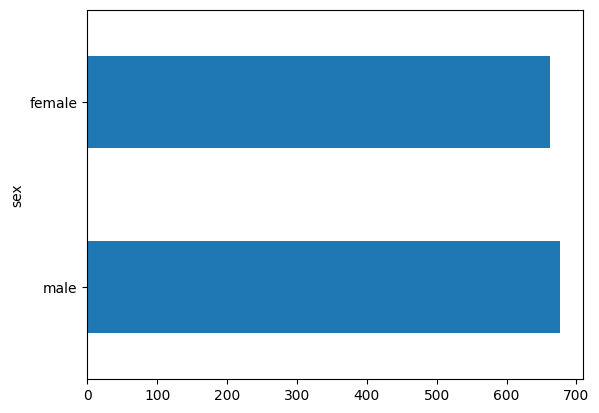

In [9]:
df['sex'].value_counts().plot(kind='barh')

<Axes: ylabel='Frequency'>

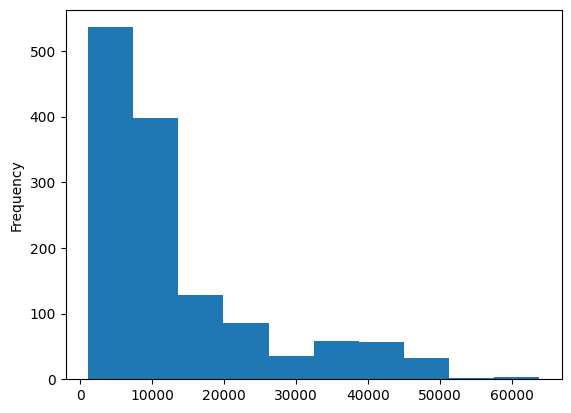

In [10]:
df['expenses'].plot(kind='hist')

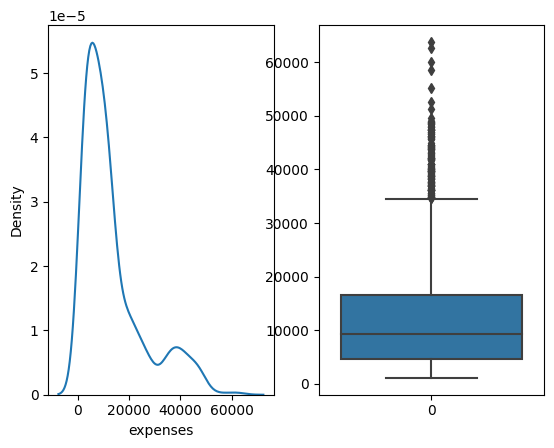

In [24]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['expenses'], ax=axes[0])
sns.boxplot(df['expenses'], ax=axes[1])
plt.show()

<Axes: ylabel='Frequency'>

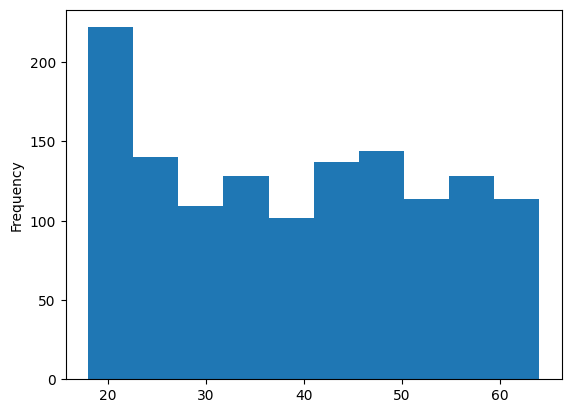

In [11]:
df['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

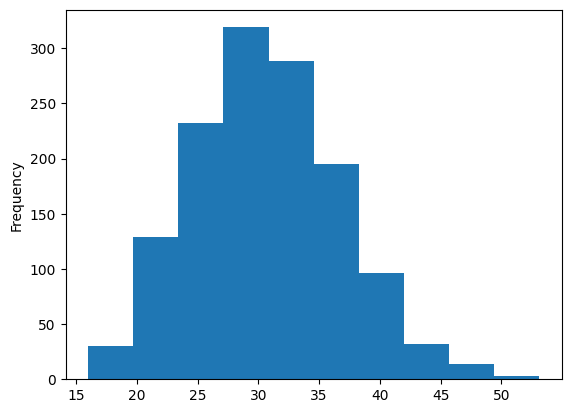

In [12]:
df['bmi'].plot(kind='hist')

<Axes: ylabel='Frequency'>

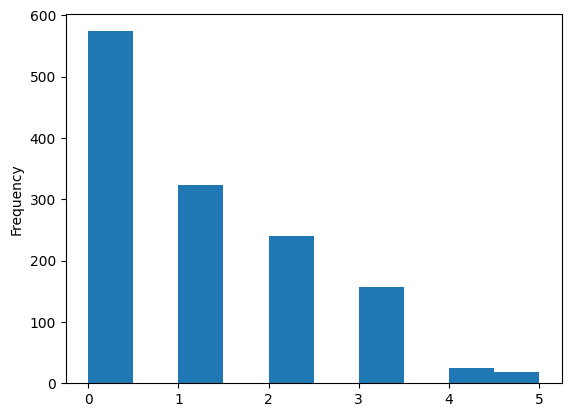

In [13]:
df['children'].plot(kind='hist')

<Axes: ylabel='smoker'>

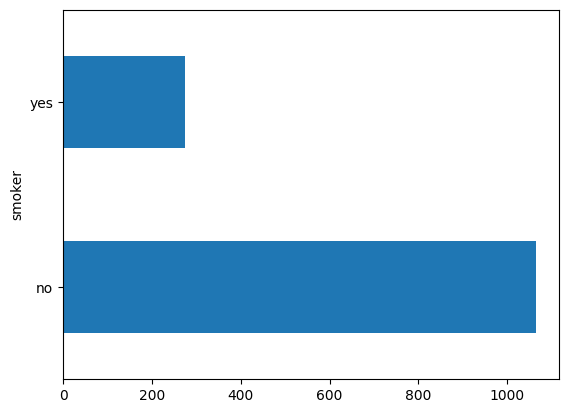

In [14]:
df['smoker'].value_counts().plot(kind='barh')

<Axes: xlabel='age', ylabel='expenses'>

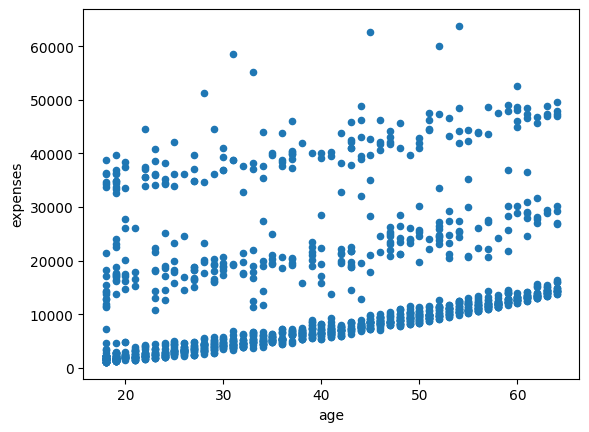

In [15]:
df[['age','expenses']].plot(x='age',y='expenses',kind='scatter')

<Axes: xlabel='bmi', ylabel='expenses'>

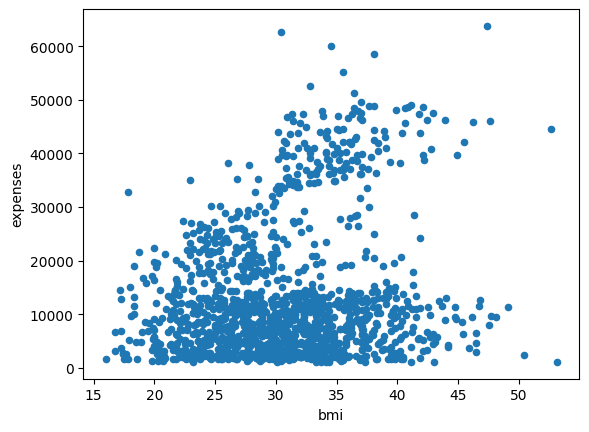

In [16]:
df[['bmi','expenses']].plot(x='bmi',y='expenses',kind='scatter')

<Axes: xlabel='age', ylabel='bmi'>

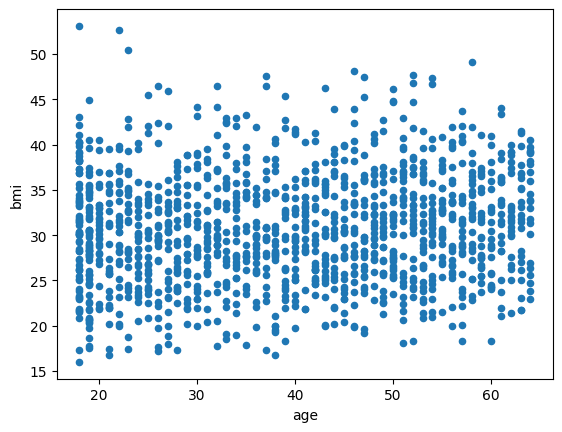

In [17]:
df[['age','bmi']].plot(x='age',y='bmi',kind='scatter')

<Axes: xlabel='smoker', ylabel='expenses'>

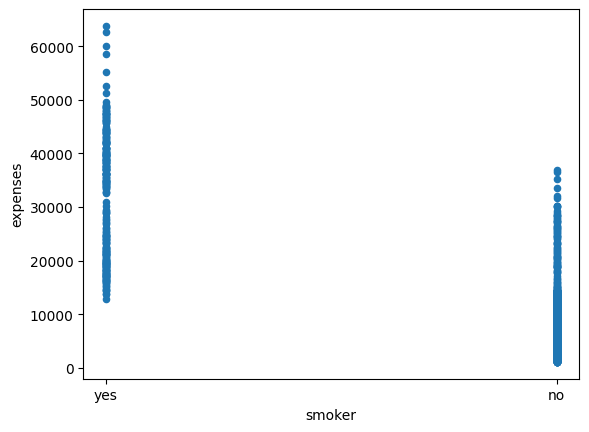

In [38]:
df[['smoker','expenses']].plot(x='smoker',y='expenses',kind='scatter')

In [27]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

In [28]:
x=df[numeric_columns]
outlier_detect(x)


 Outliers for Column :  age  Outliers count  0
[]

 Outliers for Column :  bmi  Outliers count  9
[49.1, 48.1, 47.5, 47.4, 50.4, 47.6, 52.6, 47.7, 53.1]

 Outliers for Column :  children  Outliers count  0
[]

 Outliers for Column :  expenses  Outliers count  139
[39611.76, 36837.47, 37701.88, 38711.0, 35585.58, 51194.56, 39774.28, 48173.36, 38709.18, 37742.58, 47496.49, 37165.16, 39836.52, 43578.94, 47291.06, 47055.53, 39556.49, 40720.55, 36950.26, 36149.48, 48824.45, 43753.34, 37133.9, 34779.62, 38511.63, 35160.13, 47305.31, 44260.75, 41097.16, 43921.18, 36219.41, 46151.12, 42856.84, 48549.18, 47896.79, 42112.24, 38746.36, 42124.52, 34838.87, 35491.64, 42760.5, 47928.03, 48517.56, 41919.1, 36085.22, 38126.25, 42303.69, 46889.26, 46599.11, 39125.33, 37079.37, 35147.53, 48885.14, 36197.7, 38245.59, 48675.52, 63770.43, 45863.21, 39983.43, 45702.02, 58571.07, 43943.88, 39241.44, 42969.85, 40182.25, 34617.84, 42983.46, 42560.43, 40003.33, 45710.21, 46200.99, 46130.53, 40103.89, 34806.47,

In [36]:
df.groupby("sex").expenses.agg(["mean","median","count","max"])

,mean,median,count,max
sex,,,,
female,12569.578897,9412.965,662,63770.43
male,13956.751420,9369.615,676,62592.87


In [31]:
df.groupby("smoker").age.mean()

smoker
no     39.385338
yes    38.514599
Name: age, dtype: float64

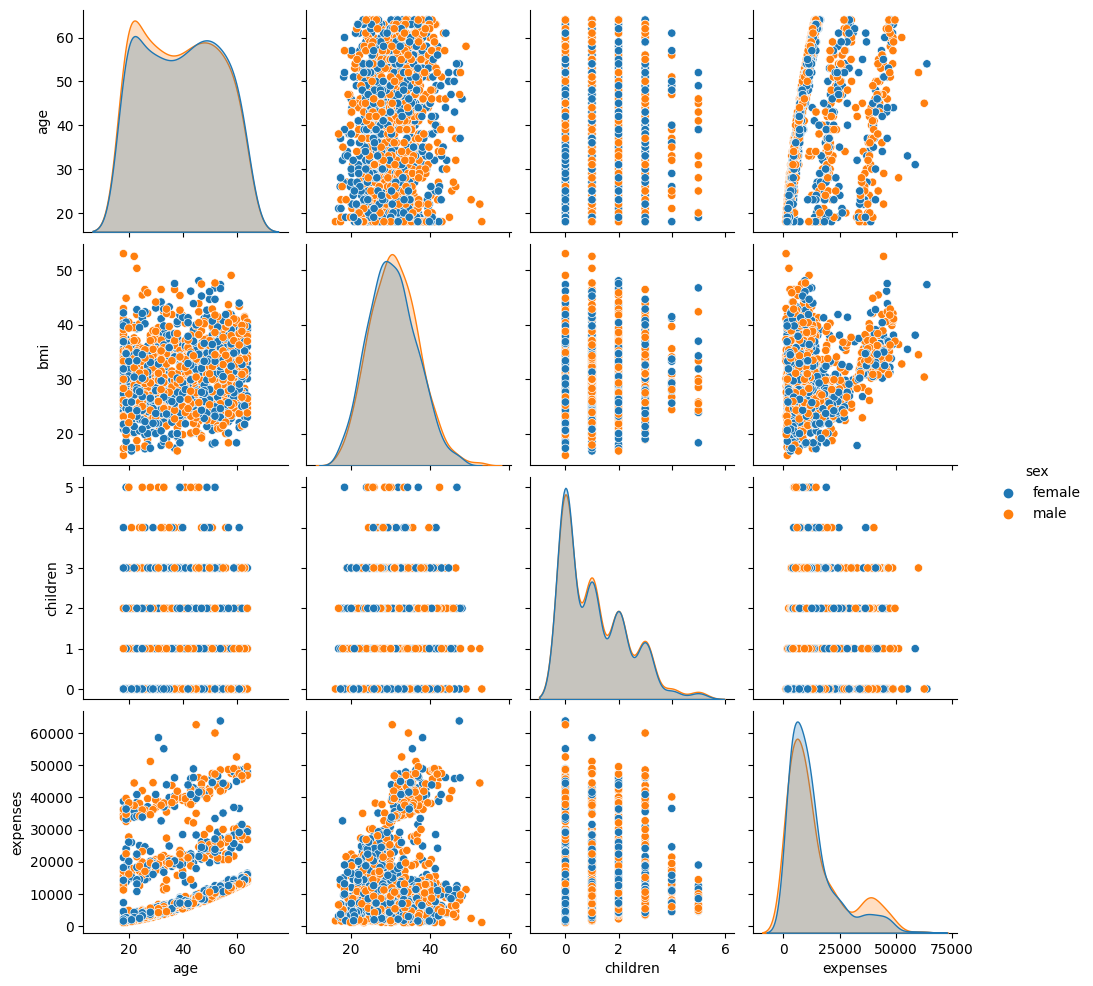

In [34]:
sns.pairplot(data=df,hue='sex')

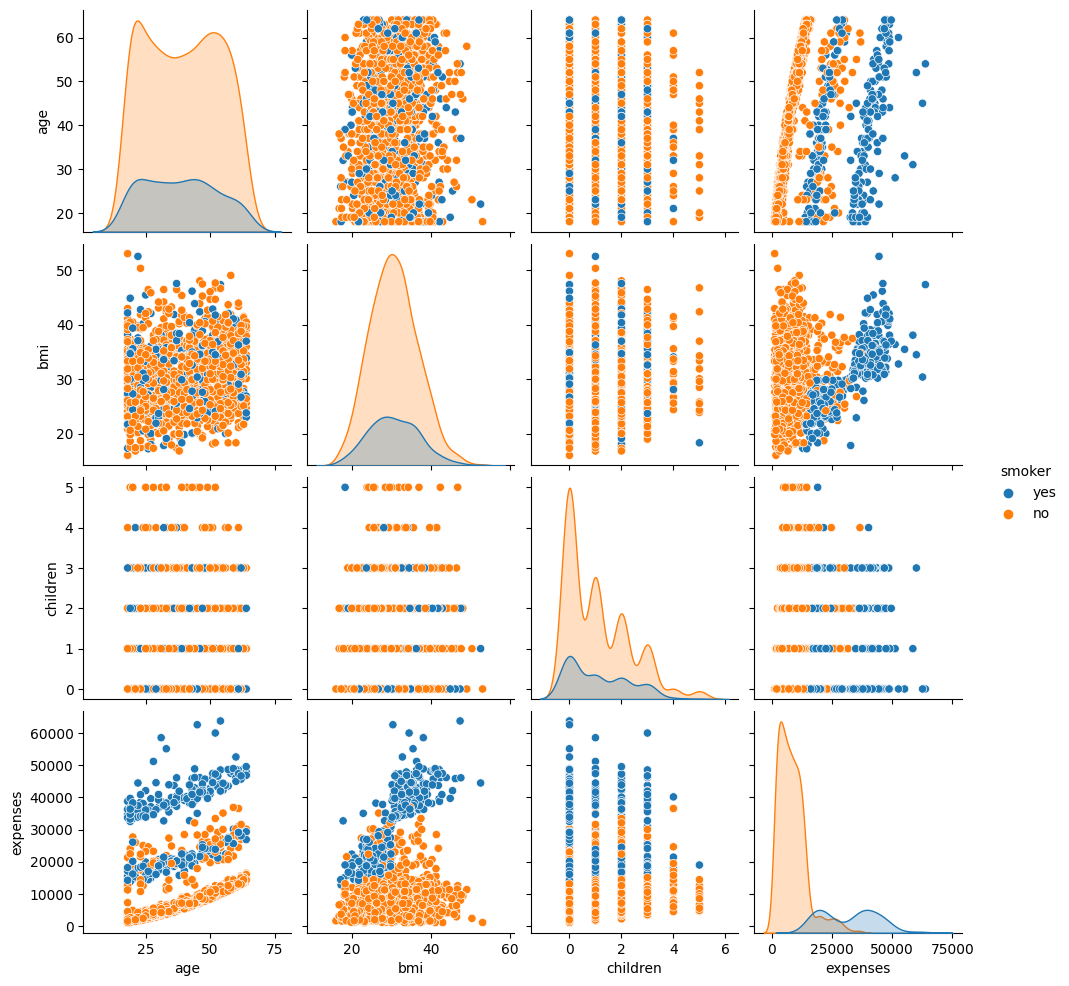

In [35]:
sns.pairplot(data=df,hue='smoker')